In [17]:
import pandas as pd

# Read the CSV files
filtered_col_mat_nuw_data = pd.read_csv("Filtered_col_mat_nuw_output.csv")
kan_data = pd.read_csv("kan_output.csv")
filtered_mon_kur_jaf_data = pd.read_csv("filtered_mon_kur_jaf_output.csv")


In [18]:
# Concatenate the DataFrames along rows (axis=0)
concatenated_df = pd.concat([filtered_col_mat_nuw_data, kan_data, filtered_mon_kur_jaf_data], ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
concatenated_df.to_csv("concatenated_output.csv", index=False)

In [19]:
concatenated_df

,HCHO Reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
12772,0.000122,Jaffna Proper,2023-12-27,2023-12-28
12773,0.000051,Jaffna Proper,2023-12-28,2023-12-29
12774,0.000127,Jaffna Proper,2023-12-29,2023-12-30
12775,0.000117,Jaffna Proper,2023-12-30,2023-12-31


In [20]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12777 entries, 0 to 12776
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HCHO Reading  12777 non-null  float64
 1   Location      12777 non-null  object 
 2   Current Date  12777 non-null  object 
 3   Next Date     12777 non-null  object 
dtypes: float64(1), object(3)
memory usage: 399.4+ KB


In [21]:
print(concatenated_df.isnull().sum())

HCHO Reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64


In [40]:
unique_values = concatenated_df['Location'].unique()

print(unique_values)

['Colombo Proper' 'Deniyaya, Matara' 'Nuwara Eliya Proper' 'Kandy Proper'
 'Bibile, Monaragala' 'Kurunegala Proper' 'Jaffna Proper']


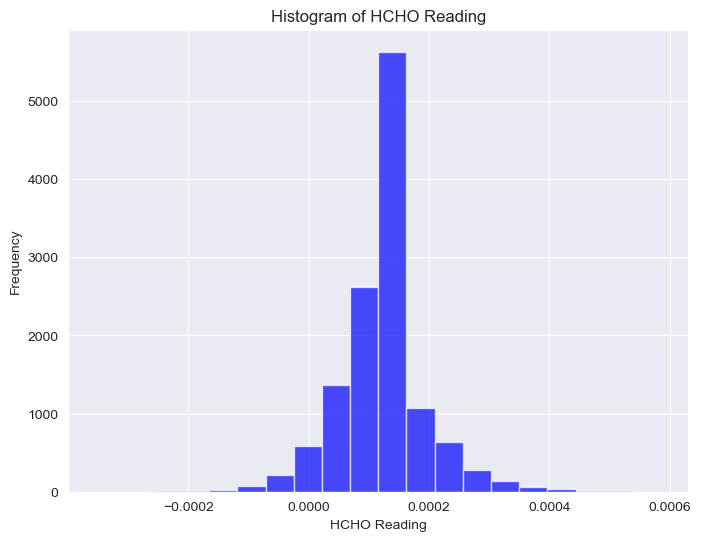

In [22]:
import matplotlib.pyplot as plt

# Visualize data distribution using histograms
plt.figure(figsize=(8, 6))
plt.hist(concatenated_df['HCHO Reading'], bins=20, color='blue', alpha=0.7)
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.title('Histogram of HCHO Reading')
plt.grid(True)
plt.show()

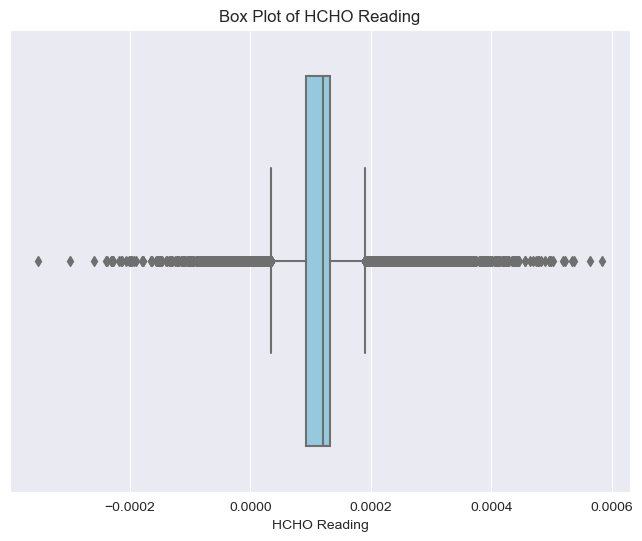

In [23]:
import seaborn as sns
# Visualize data distribution using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=concatenated_df['HCHO Reading'], color='skyblue')
plt.title('Box Plot of HCHO Reading')
plt.xlabel('HCHO Reading')
plt.show()

In [24]:
import pandas as pd

# Convert date columns to datetime format
concatenated_df['Current Date'] = pd.to_datetime(concatenated_df['Current Date'])
concatenated_df['Next Date'] = pd.to_datetime(concatenated_df['Next Date'])
concatenated_df

,HCHO Reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
12772,0.000122,Jaffna Proper,2023-12-27,2023-12-28
12773,0.000051,Jaffna Proper,2023-12-28,2023-12-29
12774,0.000127,Jaffna Proper,2023-12-29,2023-12-30
12775,0.000117,Jaffna Proper,2023-12-30,2023-12-31


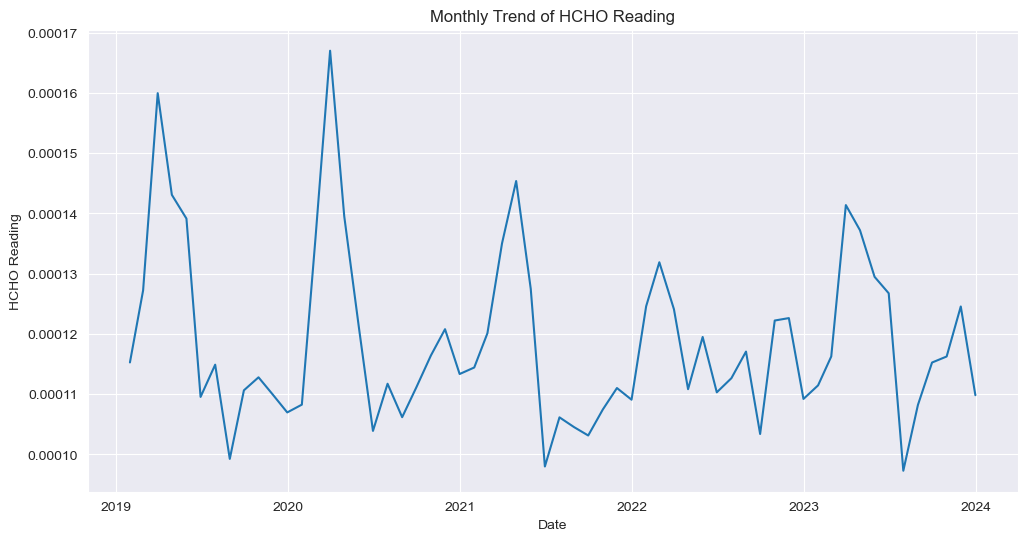

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data based on different time intervals (e.g., monthly)
monthly_data = concatenated_df.resample('M', on='Current Date').mean()  # Resample to monthly frequency

# Visualize trends over time using line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_data.index, y=monthly_data['HCHO Reading'])
plt.title('Monthly Trend of HCHO Reading')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.grid(True)
plt.show()

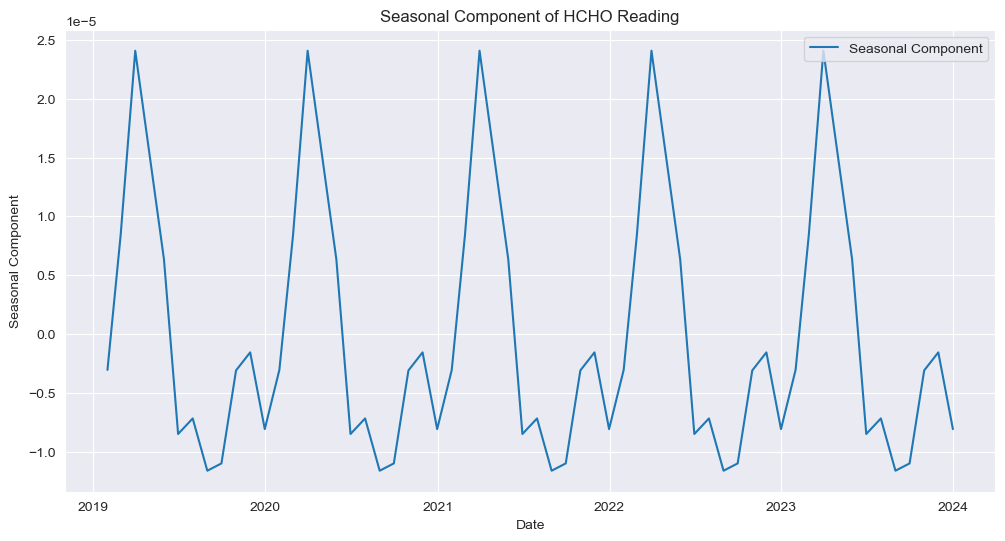

In [26]:
# Identify seasonal variations using seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(monthly_data['HCHO Reading'], period=12)  # Assuming a yearly seasonality
seasonal = decomposition.seasonal

# Visualize seasonal variations
plt.figure(figsize=(12, 6))
plt.plot(seasonal, label='Seasonal Component')
plt.title('Seasonal Component of HCHO Reading')
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.legend()
plt.grid(True)
plt.show()

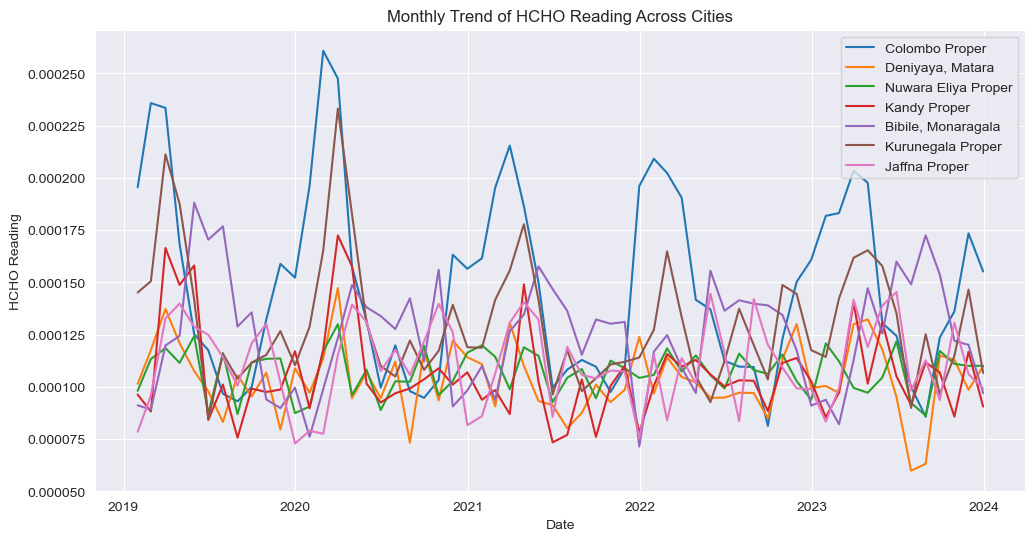

In [27]:
# Compare trends across cities (if applicable)
# Assuming data is grouped by city, you can plot multiple time series on the same plot or create separate plots for each city
# Example:
cities = concatenated_df['Location'].unique()
plt.figure(figsize=(12, 6))
for city in cities:
    city_data = concatenated_df[concatenated_df['Location'] == city]
    city_monthly_data = city_data.resample('M', on='Current Date').mean()
    sns.lineplot(x=city_monthly_data.index, y=city_monthly_data['HCHO Reading'], label=city)
plt.title('Monthly Trend of HCHO Reading Across Cities')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.show()

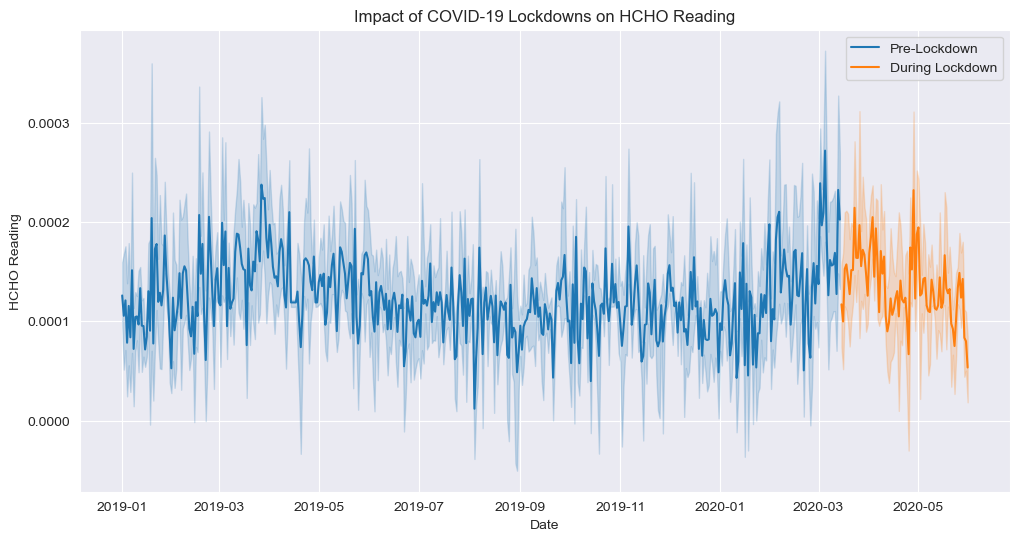

In [28]:
# Analyze impact of COVID-19 lockdowns (if applicable)
# You can filter the data to include only the period during COVID-19 lockdowns and compare it with the period before lockdowns
lockdown_start_date = pd.to_datetime("2020-03-15")
lockdown_end_date = pd.to_datetime("2020-05-31")

lockdown_data = concatenated_df[(concatenated_df['Current Date'] >= lockdown_start_date) & (concatenated_df['Current Date'] <= lockdown_end_date)]
pre_lockdown_data = concatenated_df[concatenated_df['Current Date'] < lockdown_start_date]

# Plot HCHO readings before and during lockdown
plt.figure(figsize=(12, 6))
sns.lineplot(x=pre_lockdown_data['Current Date'], y=pre_lockdown_data['HCHO Reading'], label='Pre-Lockdown')
sns.lineplot(x=lockdown_data['Current Date'], y=lockdown_data['HCHO Reading'], label='During Lockdown')
plt.title('Impact of COVID-19 Lockdowns on HCHO Reading')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
import pandas as pd

concatenated_df['date_column'] = pd.to_datetime(concatenated_df['Current Date'])

earliest_date = concatenated_df['Current Date'].min()
latest_date = concatenated_df['Current Date'].max()

print("Date Range:", earliest_date.date(), "to", latest_date.date())

Date Range: 2019-01-01 to 2023-12-31


In [34]:
external_data = pd.read_csv("external_data.csv")
external_data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN
0,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-02,0.00,78,NaN,72.0
1,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-03,0.00,81,87.0,71.0
2,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-04,0.00,83,88.0,69.0
3,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-05,0.00,84,90.0,65.0
4,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-06,0.00,82,88.0,71.0
...,...,...,...,...,...,...,...,...,...,...
8740,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-27,0.00,81,90.0,76.0
8741,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-28,0.01,80,87.0,NaN
8742,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-29,0.52,80,86.0,76.0
8743,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-30,0.48,78,87.0,NaN


In [35]:
external_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8745 entries, 0 to 8744
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    8745 non-null   object 
 1   NAME       8745 non-null   object 
 2   LATITUDE   8745 non-null   float64
 3   LONGITUDE  8745 non-null   float64
 4   ELEVATION  8745 non-null   float64
 5   DATE       8745 non-null   object 
 6   PRCP       8708 non-null   float64
 7   TAVG       8745 non-null   int64  
 8   TMAX       7786 non-null   float64
 9   TMIN       7099 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 683.3+ KB


In [37]:
# Convert column names to lowercase
external_data.columns = external_data.columns.str.lower()
external_data

,station,name,latitude,longitude,elevation,date,prcp,tavg,tmax,tmin
0,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-02,0.00,78,NaN,72.0
1,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-03,0.00,81,87.0,71.0
2,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-04,0.00,83,88.0,69.0
3,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-05,0.00,84,90.0,65.0
4,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-06,0.00,82,88.0,71.0
...,...,...,...,...,...,...,...,...,...,...
8740,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-27,0.00,81,90.0,76.0
8741,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-28,0.01,80,87.0,NaN
8742,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-29,0.52,80,86.0,76.0
8743,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-30,0.48,78,87.0,NaN


In [38]:
# Convert all data to lowercase
external_data = external_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
external_data

,station,name,latitude,longitude,elevation,date,prcp,tavg,tmax,tmin
0,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-02,0.00,78,NaN,72.0
1,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-03,0.00,81,87.0,71.0
2,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-04,0.00,83,88.0,69.0
3,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-05,0.00,84,90.0,65.0
4,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-06,0.00,82,88.0,71.0
...,...,...,...,...,...,...,...,...,...,...
8740,cem00043424,"puttalam, ce",8.033,79.833,2.0,2023-12-27,0.00,81,90.0,76.0
8741,cem00043424,"puttalam, ce",8.033,79.833,2.0,2023-12-28,0.01,80,87.0,NaN
8742,cem00043424,"puttalam, ce",8.033,79.833,2.0,2023-12-29,0.52,80,86.0,76.0
8743,cem00043424,"puttalam, ce",8.033,79.833,2.0,2023-12-30,0.48,78,87.0,NaN


In [39]:
unique_values = external_data['name'].unique()

print(unique_values)

['kurunegala, ce' 'china bay, ce' 'colombo, ce' 'nuwara eliya, ce'
 'puttalam, ce']


In [41]:
concatenated_df

,HCHO Reading,Location,Current Date,Next Date,date_column
0,0.000197,Colombo Proper,2019-01-01,2019-01-02,2019-01-01
1,0.000263,Colombo Proper,2019-01-02,2019-01-03,2019-01-02
2,0.000099,Colombo Proper,2019-01-03,2019-01-04,2019-01-03
3,0.000210,Colombo Proper,2019-01-04,2019-01-05,2019-01-04
4,0.000179,Colombo Proper,2019-01-05,2019-01-06,2019-01-05
...,...,...,...,...,...
12772,0.000122,Jaffna Proper,2023-12-27,2023-12-28,2023-12-27
12773,0.000051,Jaffna Proper,2023-12-28,2023-12-29,2023-12-28
12774,0.000127,Jaffna Proper,2023-12-29,2023-12-30,2023-12-29
12775,0.000117,Jaffna Proper,2023-12-30,2023-12-31,2023-12-30


In [42]:
external_data.rename(columns={'name': 'Location', 'date': 'Current Date'}, inplace=True)
external_data

,station,Location,latitude,longitude,elevation,Current Date,prcp,tavg,tmax,tmin
0,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-02,0.00,78,NaN,72.0
1,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-03,0.00,81,87.0,71.0
2,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-04,0.00,83,88.0,69.0
3,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-05,0.00,84,90.0,65.0
4,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-06,0.00,82,88.0,71.0
...,...,...,...,...,...,...,...,...,...,...
8740,cem00043424,"puttalam, ce",8.033,79.833,2.0,2023-12-27,0.00,81,90.0,76.0
8741,cem00043424,"puttalam, ce",8.033,79.833,2.0,2023-12-28,0.01,80,87.0,NaN
8742,cem00043424,"puttalam, ce",8.033,79.833,2.0,2023-12-29,0.52,80,86.0,76.0
8743,cem00043424,"puttalam, ce",8.033,79.833,2.0,2023-12-30,0.48,78,87.0,NaN


In [45]:
# Check for missing values in the entire DataFrame
missing_values_total = external_data.isna().sum()

print("Missing Values in Each Column:")
print(missing_values_total)

Missing Values in Each Column:
station            0
Location           0
latitude           0
longitude          0
elevation          0
Current Date       0
prcp              37
tavg               0
tmax             959
tmin            1646
dtype: int64


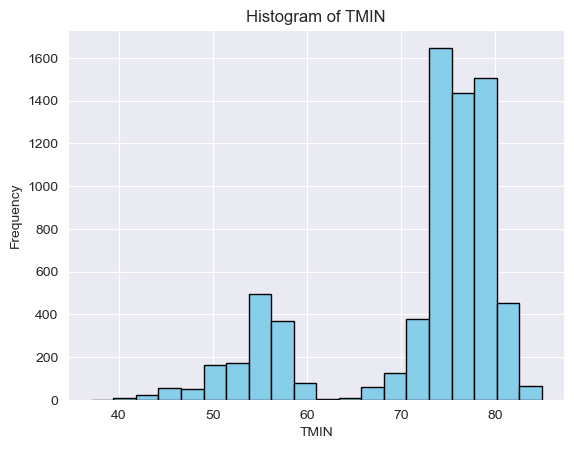

In [47]:
# Filter out NaN values in the 'TMIN' column
tmin_values = external_data['tmin'].dropna()

# Create the histogram
plt.hist(tmin_values, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('TMIN')
plt.ylabel('Frequency')
plt.title('Histogram of TMIN')

# Show the plot
plt.show()

In [49]:
# Assuming 'external_data' is your DataFrame

# Generate statistical report for the 'TMIN' column
tmin_report = external_data['tmin'].describe()

print("Statistical Report for TMIN Column:")
print(tmin_report)


Statistical Report for TMIN Column:
count    7099.000000
mean       71.878856
std         9.451779
min        37.000000
25%        72.000000
50%        75.000000
75%        78.000000
max        85.000000
Name: tmin, dtype: float64


In [50]:
# Filling null values in the 'TMIN' column with the mean value
mean_tmin = external_data['tmin'].mean()
external_data['tmin'] = external_data['tmin'].fillna(mean_tmin)

In [51]:
tmin_report_updated = external_data['tmin'].describe()
print("Updated Statistical Report for TMIN Column:")
print(tmin_report_updated)

Updated Statistical Report for TMIN Column:
count    8745.000000
mean       71.878856
std         8.515820
min        37.000000
25%        71.878856
50%        74.000000
75%        77.000000
max        85.000000
Name: tmin, dtype: float64


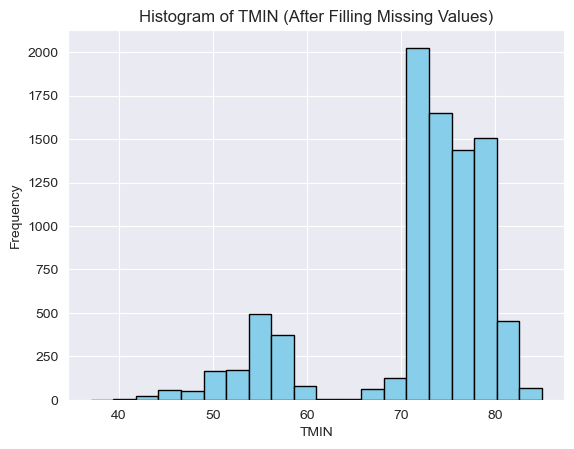

In [52]:
import matplotlib.pyplot as plt

# Create the histogram for the 'TMIN' column
plt.hist(external_data['tmin'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('TMIN')
plt.ylabel('Frequency')
plt.title('Histogram of TMIN (After Filling Missing Values)')

# Show the plot
plt.show()


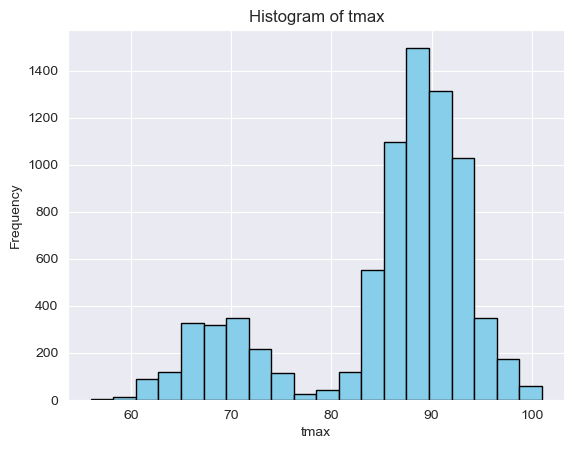

In [56]:
# Filter out NaN values in the 'TMIN' column
tmax_values = external_data['tmax'].dropna()

# Create the histogram
plt.hist(tmax_values, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('tmax')
plt.ylabel('Frequency')
plt.title('Histogram of tmax')

# Show the plot
plt.show()

In [58]:
# Assuming 'external_data' is your DataFrame

# Generate statistical report for the 'TMIN' column
tmax_report = external_data['tmax'].describe()

print("Statistical Report for tmax Column:")
print(tmax_report)

Statistical Report for tmax Column:
count    7786.000000
mean       85.329951
std         9.064695
min        56.000000
25%        84.000000
50%        88.000000
75%        91.000000
max       101.000000
Name: tmax, dtype: float64


In [59]:
mean_tmax = external_data['tmax'].mean()
external_data['tmax'] = external_data['tmax'].fillna(mean_tmax)

# Print the updated statistical report for 'TMAX' column
tmax_report_updated = external_data['tmax'].describe()
print("Updated Statistical Report for TMAX Column:")
print(tmax_report_updated)


Updated Statistical Report for TMAX Column:
count    8745.000000
mean       85.329951
std         8.553177
min        56.000000
25%        85.000000
50%        88.000000
75%        90.000000
max       101.000000
Name: tmax, dtype: float64


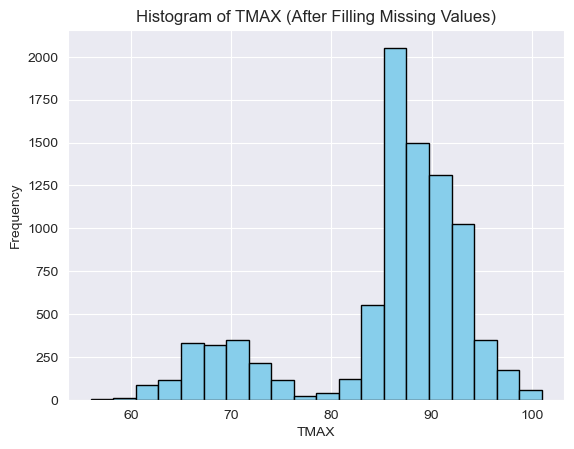

In [60]:
import matplotlib.pyplot as plt

# Create the histogram for the 'TMAX' column
plt.hist(external_data['tmax'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('TMAX')
plt.ylabel('Frequency')
plt.title('Histogram of TMAX (After Filling Missing Values)')

# Show the plot
plt.show()

In [61]:
external_data.isnull().sum()

station          0
Location         0
latitude         0
longitude        0
elevation        0
Current Date     0
prcp            37
tavg             0
tmax             0
tmin             0
dtype: int64